# Introduction

This notebook compares the original NN and the PSO-NN for different datasets.

The dataset can be used via libraries like `sklearn` or `tensorflow`. The datasets used are:
- Iris
- Wine
- Breast Cancer

Comparing the performance of PSO-based optimization with traditional backpropagation
in terms of accuracy and convergence speed.

✓ Comparing behaviour and results in three different datasets your choice. You are
allowed to choose any, but you are expected to reason, explain and compare the results.

✓ Analyzing the influence of various PSO parameters (w, c1, c2, and velocity limits) on
optimization performance.

✓ Identifying strengths and weaknesses of PSO for neural network training, particularly in
terms of handling high-dimensional search spaces.

In [2]:
#Loading all 3 dataset and creating train test splits.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#import iris dataset from sklearn
from sklearn.datasets import load_iris,load_breast_cancer,load_wine
from sklearn.preprocessing import LabelEncoder


#Loading the dataset from the internet
datasets = [load_iris(),load_breast_cancer(),load_wine()]
dataset_names = ['iris','breast_cancer','wine']
#create train test splits for each dataset and put them in a dictionary
sets = []
for i,dataset in enumerate(datasets):
    datadict ={}
    # Do the split
    # Please don't change the test_train_ration
    data = dataset
    TEST_SPLIT_RATIO = 0.2
    X = data['data']
    y = data['target']
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT_RATIO, random_state=42)
    
    datadict['X_train'] = X_train
    datadict['X_test'] = X_test
    datadict['y_train'] = y_train
    datadict['y_test'] = y_test
    sets.append(datadict)
    
print(sets[0].keys())


dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])


# Performance Comparison

Comparing the performance of PSO-based optimization with traditional backpropagation
in terms of accuracy and convergence speed.


#### Testing on iris dataset ####

Number of hidden layers: 10
Activation function: <function sigmoid at 0x0000019959EB3310>
Number of variables to optimize: 83
PSO parameters C1: 2.0 C2: 2.0 W: 0.7 SwarmSize: 100 Iterations: 1000


c:\Users\stefa\Desktop\repos\SOS-Assignment-2-WISE-24-25\python_code\PSO-NN.py:96: RuntimeWarning: divide by zero encountered in scalar divide
  acc.append(1/accuracy)
c:\Users\stefa\Desktop\repos\SOS-Assignment-2-WISE-24-25\python_code\activations.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


51
51
50


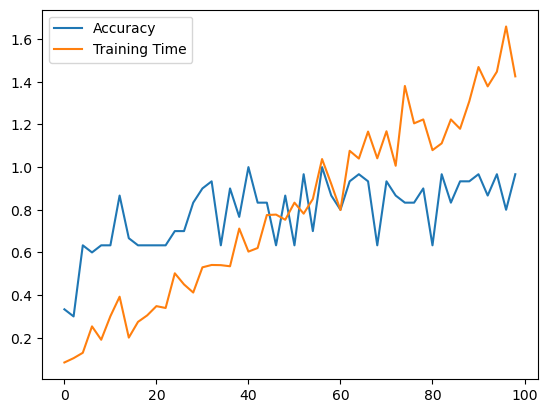

c:\Users\stefa\Desktop\repos\SOS-Assignment-2-WISE-24-25\python_code\activations.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Backpropagation training time: 0.06 seconds
Accuracy Classic-NN: 0.30

#### Testing on breast_cancer dataset ####

Number of hidden layers: 10
Activation function: <function sigmoid at 0x0000019959EB3310>
Number of variables to optimize: 332
PSO parameters C1: 2.0 C2: 2.0 W: 0.7 SwarmSize: 100 Iterations: 100


c:\Users\stefa\Desktop\repos\SOS-Assignment-2-WISE-24-25\python_code\PSO-NN.py:96: RuntimeWarning: divide by zero encountered in scalar divide
  acc.append(1/accuracy)


51
51
50


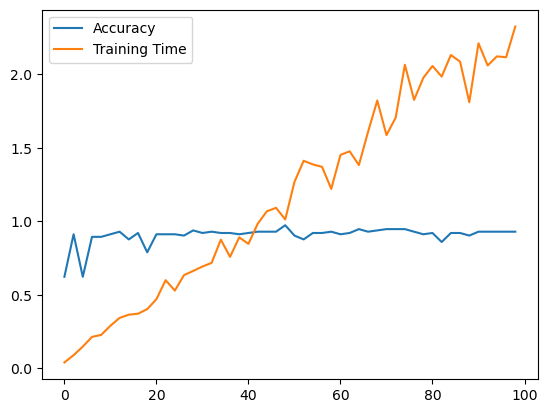

c:\Users\stefa\Desktop\repos\SOS-Assignment-2-WISE-24-25\python_code\activations.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Backpropagation training time: 0.13 seconds
Accuracy Classic-NN: 0.62

#### Testing on wine dataset ####

Number of hidden layers: 10
Activation function: <function sigmoid at 0x0000019959EB3310>
Number of variables to optimize: 173
PSO parameters C1: 2.0 C2: 2.0 W: 0.7 SwarmSize: 100 Iterations: 100


c:\Users\stefa\Desktop\repos\SOS-Assignment-2-WISE-24-25\python_code\PSO-NN.py:96: RuntimeWarning: divide by zero encountered in scalar divide
  acc.append(1/accuracy)


51
51
50


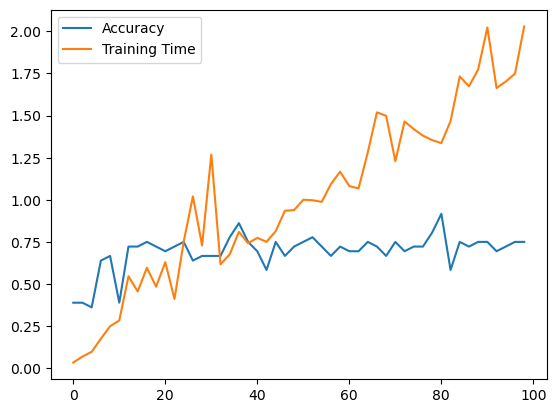

Backpropagation training time: 0.03 seconds
Accuracy Classic-NN: 0.39

#### Overall Comparison Results ####

Dataset: iris
PSO-NN Accuracy: 0.97 | Time: 1.43 seconds
Classic-NN Accuracy: 0.30 | Time: 0.06 seconds

Dataset: breast_cancer
PSO-NN Accuracy: 0.93 | Time: 2.33 seconds
Classic-NN Accuracy: 0.62 | Time: 0.13 seconds

Dataset: wine
PSO-NN Accuracy: 0.75 | Time: 2.03 seconds
Classic-NN Accuracy: 0.39 | Time: 0.03 seconds



In [3]:
import importlib
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
# Import modules
PSO = importlib.import_module("PSO-NN")
CS = importlib.import_module("classic-NN")
from commonsetup import n_hidden, X_train, X_test, y_train, y_test, n_inputs, n_classes, activation, n_iteration, learning_rate

# Set PSO parameters
par_C1 = 2.0
par_C2 = 2.0
par_W = 0.7
par_SwarmSize = 100
batchsize = 50  # Number of data instances used by the fitness function
#n_iteration = 1000000

# Initialize results storage
results = []

#setss = [sets[1]]

# Iterate over datasets
for i, datadict in enumerate(sets):
    
    print(f"\n#### Testing on {dataset_names[i]} dataset ####\n")

    # Extract train/test data
    X_train = datadict['X_train']
    X_test = datadict['X_test']
    y_train = datadict['y_train']
    y_test = datadict['y_test']
    
    # Dynamically set inputs and classes
    n_inputs = X_train.shape[1]
    n_classes = len(np.unique(y_train))

    # Print settings
    print("Number of hidden layers:", n_hidden)
    print("Activation function:", activation[0])
    print("Number of variables to optimize:", (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes)
    print("PSO parameters C1:", par_C1, "C2:", par_C2, "W:", par_W, "SwarmSize:", par_SwarmSize, "Iterations:", n_iteration)
    n_iteration = 100
    accs = [0]
    traintimes = [0]
    stepsize = 2
    for n_i in range(1,n_iteration)[::stepsize]:
        #print(n_i)
        # PSO Optimization
        nn_pso = PSO.NeuralNetwork(n_inputs, n_hidden, n_classes, activation[0])
        def optimize_pso():
            pso = PSO.PSOOptimizer(nn_pso, par_C1, par_C2, par_W, par_SwarmSize, n_i, batchsize)
            weights = pso.optimize(X_train, y_train,verbose=False)
            return weights

        pso_time = timeit.timeit(optimize_pso, number=1)
        traintimes.append(pso_time)
        weights = optimize_pso()
        y_pred_pso = nn_pso.predict(weights, X_test)
        pso_accuracy = (y_pred_pso == y_test).mean()
        accs.append(pso_accuracy)

        #print(f"PSO optimization time: {pso_time:.2f} seconds")
        #print(f"Accuracy PSO-NN: {pso_accuracy:.2f}")
    
    print(len(accs))
    print(len(traintimes))
    print(len(range(n_iteration)[::stepsize]))
    #plott acuracy and training times to n iterations using seaborn
    sns.lineplot(x=range(n_iteration)[::stepsize],y=accs[1:],label='Accuracy')
    sns.lineplot(x=range(n_iteration)[::stepsize],y=traintimes[1:],label='Training Time')
    plt.show()

    # Backpropagation Training
    def train_backprop():
        nn_classic = CS.NeuralNetwork(n_inputs, n_hidden, n_classes, activation[0], activation[1])
        nn_classic.train(X_train, y_train, n_iteration, learning_rate, verbose=False)
        return nn_classic

    backprop_time = timeit.timeit(train_backprop, number=1)
    nn_classic = train_backprop()
    y_pred_classic = nn_classic.predict(X_test)
    backprop_accuracy = (y_pred_classic == y_test).mean()

    print(f"Backpropagation training time: {backprop_time:.2f} seconds")
    print(f"Accuracy Classic-NN: {backprop_accuracy:.2f}")

    # Store results
    results.append({
        'dataset': dataset_names[i],
        'pso_accuracy': pso_accuracy,
        'pso_time': pso_time,
        'backprop_accuracy': backprop_accuracy,
        'backprop_time': backprop_time
    })

# Print overall comparison
print("\n#### Overall Comparison Results ####\n")
for result in results:
    print(f"Dataset: {result['dataset']}")
    print(f"PSO-NN Accuracy: {result['pso_accuracy']:.2f} | Time: {result['pso_time']:.2f} seconds")
    print(f"Classic-NN Accuracy: {result['backprop_accuracy']:.2f} | Time: {result['backprop_time']:.2f} seconds\n")

Classical NN is way faster but has a worse accuracy than PSO-NN. PSO-NN is slower but has a better accuracy. This is still not perfect since classical NN is highly dependent on the initial weights and the learning rate. PSO-NN is more stable and has a better accuracy. A random seed is used to make the comparision reliable.

Also for PSO it can be seen that the training time increases linearly with the number of iterations. But from the line chart, it can be seen that the accuracy already plateaus after ~50 iterations and a trainig time of ~0.6s for the iris dataset. This is still a magnitude of 100 slower than the classical NN.

For breastcancer and wine the pso converges even faster already after ~5 and ~20 iterations. The training time is ~0.1 and ~0.25s. So the results show that the performance of PSO in training time is highly dependent on the dataset. In this case the accuracy is always better than the classical NN. 

# Part 2

Analyzing the influence of various PSO parameters (w, c1, c2, and velocity limits) on
optimization performance.

c:\Users\stefa\Desktop\repos\SOS-Assignment-2-WISE-24-25\python_code\activations.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


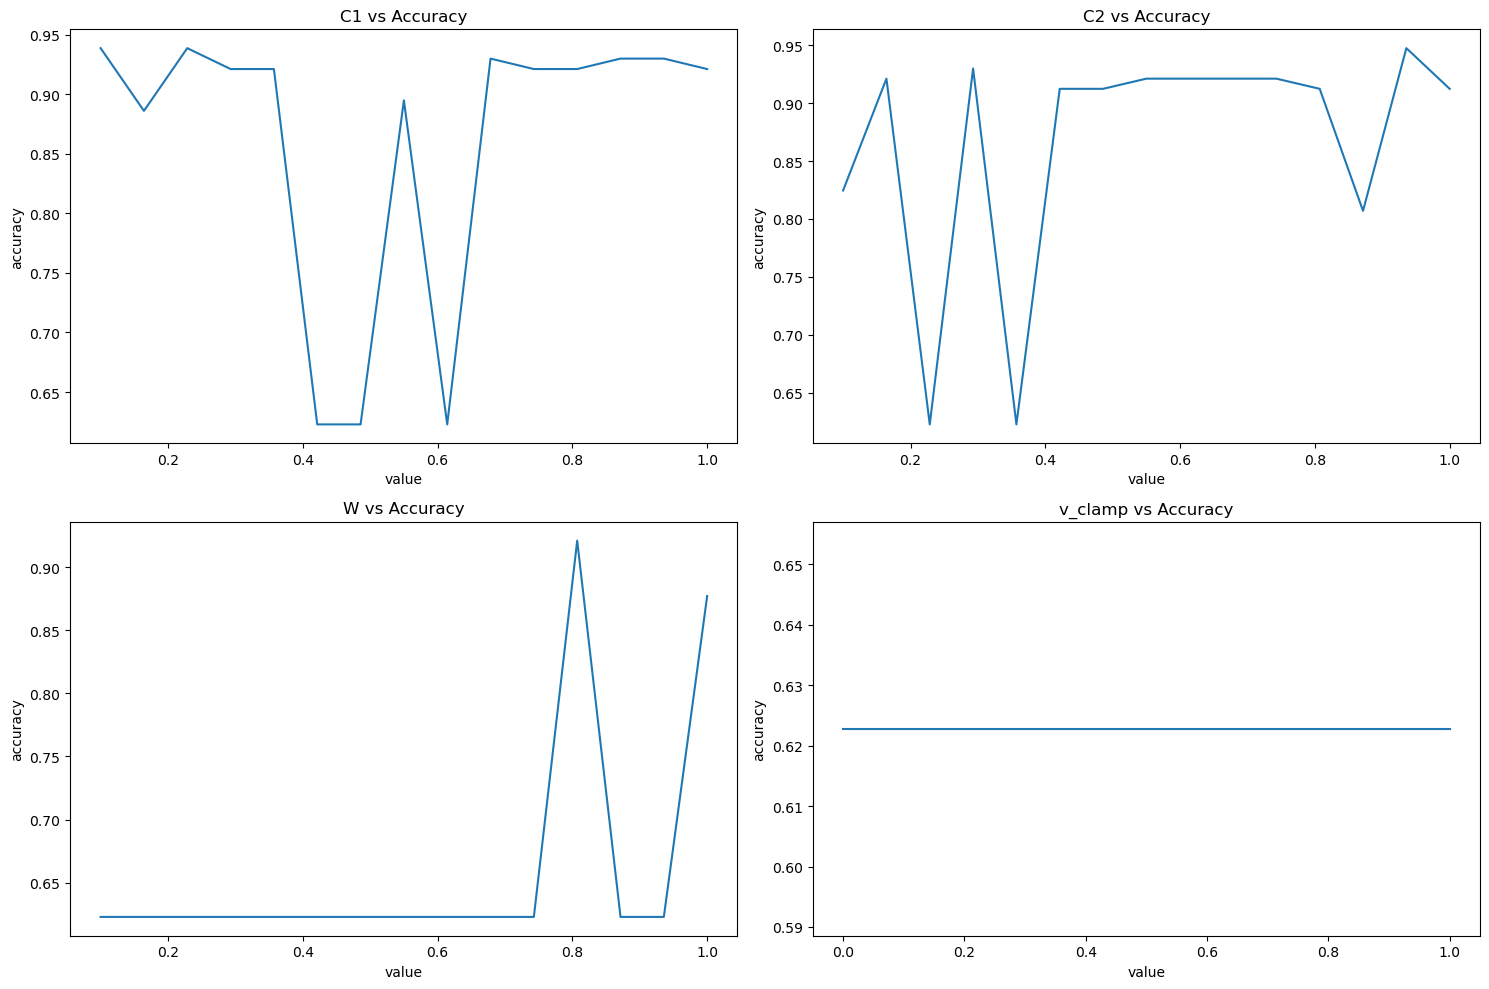

In [5]:
# analyze the influence of pso parameters w,c1,c2 and velocity limits.
from commonsetup import n_hidden, X_train, X_test, y_train, y_test, n_inputs, n_classes, activation, n_iteration
PSO = importlib.import_module("PSO-NN")
# Default values
default_C1 = 0.5
default_C2 = 0.3
default_W = 0.9
default_v_clamp = None
SwarmSize = 100
batchsize = 50
n_iteration = 20


def test_parameter(param_name, param_values):
    results = []
    for value in param_values:
        C1, C2, W, v_clamp = default_C1, default_C2, default_W, default_v_clamp
        
        if param_name == 'C1': C1 = value
        elif param_name == 'C2': C2 = value
        elif param_name == 'W': W = value
        elif param_name == 'v_clamp': v_clamp = (0, value)
        
        # nn_pso = PSO.NeuralNetwork(n_inputs, n_hidden, n_classes, activation[0])
        # pso = PSO.PSOOptimizer(nn_pso, C1, C2, W, SwarmSize, 100, batchsize)
        # pso.optimizer_options = {'velocity_clamp': v_clamp}
        
        # weights = pso.optimize(X_train, y_train, verbose=False)
        # y_pred = nn_pso.predict(weights, X_test)
        # accuracy = (y_pred == y_test).mean()
        
        # results.append({'value': value, 'accuracy': accuracy})
        accuracies = []
        for _ in range(10):  # Run the PSO optimization 3 times
            nn_pso = PSO.NeuralNetwork(n_inputs, n_hidden, n_classes, activation[0])
            pso = PSO.PSOOptimizer(nn_pso, C1, C2, W, SwarmSize, n_iteration, batchsize)
            weights = pso.optimize(X_train, y_train,v_clamp, False)
            y_pred = nn_pso.predict(weights, X_test)
            accuracy = (y_pred == y_test).mean()
            accuracies.append(accuracy)
        
        avg_accuracy = sum(accuracies) / len(accuracies)
        results.append({'value': value, 'accuracy': avg_accuracy})
    return pd.DataFrame(results)

# Test each parameter
parameters = {
    'C1': np.linspace(0.1, 1.0, 15),
    'C2': np.linspace(0.1, 1.0, 15),
    'W': np.linspace(0.1, 1.0, 15),
    'v_clamp': np.linspace(0,1, 15)
}

results = {}
for param, values in parameters.items():
    results[param] = test_parameter(param, values)

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plot_positions = {'C1': [0,0], 'C2': [0,1], 'W': [1,0], 'v_clamp': [1,1]}

for param, df in results.items():
    pos = plot_positions[param]
    sns.lineplot(data=df, x='value', y='accuracy', ax=axes[pos[0], pos[1]])
    axes[pos[0], pos[1]].set_title(f'{param} vs Accuracy')

plt.tight_layout()
plt.show()

# Part 3

PSO on high-dimensional search spaces.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import importlib

# Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.to_numpy()
y = y.to_numpy()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the PSO implementation
PSO = importlib.import_module("PSO-NN")

# Define Neural Network and PSO parameters
n_inputs = X_train.shape[1]
n_hidden = 128 # One hidden layer with 128 neurons
n_classes = len(np.unique(y))
activation = ['relu']  # Activation function for the hidden layer
n_iteration = 20
SwarmSize = 50
batchsize = 20

# Default PSO parameters
C1, C2, W = 0.5, 0.3, 0.9
v_clamp = (0, 2)


def train_with_pso():
    # Create and train the PSO-based Neural Network
    nn_pso = PSO.NeuralNetwork(n_inputs, n_hidden, n_classes, activation[0])
    pso = PSO.PSOOptimizer(nn_pso, C1, C2, W, SwarmSize, n_iteration, batchsize)
    weights = pso.optimize(X_train, y_train, v_clamp, verbose=True)
    return nn_pso, weights


# Train the model
nn_pso, optimal_weights = train_with_pso()

# Evaluate the model
y_pred = nn_pso.predict(optimal_weights, X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on MNIST test set using PSO: {accuracy:.4f}")

# Plot convergence behavior
def plot_convergence(pso):
    plt.plot(pso.history, label='Fitness Value')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('PSO Convergence on MNIST')
    plt.legend()
    plt.grid(True)
    plt.show()


# Assuming PSO keeps a history of fitness values
plot_convergence(pso)


c:\Users\stefa\.conda\envs\sos_pso\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
2024-12-25 15:40:55,068 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/20


KeyError: '[23273, 20499, 37592, 46051, 53074, 6328, 55569, 25250] not in index'